In [2]:
import pandas as pd
import numpy as np
from haversine import haversine
from pandas import option_context
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def great_circle_distance(p1, p2):
    return haversine(p1, p2, unit='km')

map_plotter = Basemap()

df = pd.read_csv('data/coordinates.csv')
df.head()

,Heading,City,Country code,Latitude,Longitude
0,Zika Outbreak Hits Miami,Miami,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,US,25.79065,-80.13005
3,"Mystery Virus Spreads in Recife, Brazil",Recife,BR,-8.05389,-34.88111
4,Dallas man comes down with case of Zika,Dallas,US,44.91928,-123.31705


In [3]:
df = df[df.Heading.str.contains('Zika|Mad Cow|MDC') == True]
display(df.head(10))

,Heading,City,Country code,Latitude,Longitude
0,Zika Outbreak Hits Miami,Miami,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,US,25.79065,-80.13005
4,Dallas man comes down with case of Zika,Dallas,US,44.91928,-123.31705
5,Trinidad confirms first Zika case,Trinidad,BO,-14.83333,-64.90000
6,Zika Concerns are Spreading in Houston,Houston,US,29.76328,-95.36327
9,Zika Infested Monkeys in Sao Paulo,São Paulo,BR,-23.54750,-46.63611
10,Brownsville teen contracts Zika virus,Brownsville,US,40.66094,-73.92014
11,Mosquito control efforts in St. Louis take new...,St. Louis,US,38.62727,-90.19789
12,San Juan reports 1st U.S. Zika-related death a...,San Juan,AR,-31.53750,-68.53639


In [6]:
us_df = df[df['Country code'] == 'US']
world_df = df[df['Country code'] != 'US']

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


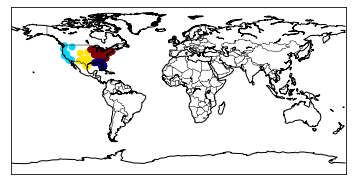

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

                                                       Heading Distance
520                    More Zika patients reported in Lakeland    68.13
560                                 Zika spreads to Plant City  70.9106
58                  New Zika Case Confirmed in Sarasota County   71.358
420                      Bradenton Experiences Zika Troubles    75.0671
19                       Tampa Bay Area Zika Case Count Climbs  84.8297
375                  More Zika patients reported in Fort Myers  90.8158
239                                Zika Strikes St. Petersburg  92.6676
493          Stony Brook University experts discuss Zika virus  93.5053
423                                  Zika spreads to Kissimmee  104.082
91                           Zika Patient in Seminole, Florida  105.844
373                    Zika symptoms spotted in Bonita Springs  122.188
17                        Orlando volunteers aid Zika research   129.67
441                                Zika spreads to Winter Park  

In [7]:
coordinates = us_df[['Longitude', 'Latitude']]
cluster_model_kmeans = KMeans(n_clusters=4)
predicted_kmeans = cluster_model_kmeans.fit_predict(coordinates)
us_df['cluster'] = predicted_kmeans
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.scatter(coordinates['Longitude'], coordinates['Latitude'], c=predicted_kmeans, latlon=True, cmap=plt.cm.jet)
plt.show()
for cluster_number in range(0, 4):
    cluster = us_df[us_df.cluster == cluster_number]
    mean_lat, mean_lon = np.mean(cluster['Latitude']), np.mean(cluster['Longitude'])
    cluster['Distance'] = None
    for i in cluster.index:
        cluster['Distance'][i] = great_circle_distance((mean_lat, mean_lon), (cluster['Latitude'][i], cluster['Longitude'][i]))
    cluster = cluster.sort_values(by=['Distance'])
    with option_context('display.max_colwidth', 400):
        print(cluster[['Heading', 'Distance']])

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


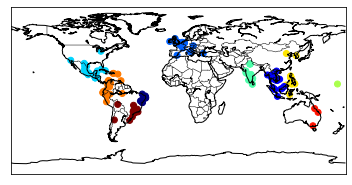

/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/eugene/anaconda3/envs/discovering-disease-outbreaks/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

                                        Heading Distance
453     More Zika patients reported in Custodia  82.8661
515              Zika case reported in Limoeiro   199.04
390                      Zika spreads to Olinda  255.885
190  More Zika patients reported in Joao Pessoa   297.07
281                       Zika arrives in Natal  375.781
319              Zika case reported in Jacobina  470.893
271     More Zika patients reported in Camacari  474.229
30                   Zika spreading to Salvador  509.262
349          Zika symptoms spotted in Fortaleza  566.409
                                            Heading Distance
574     More Zika patients reported in Kampong Speu  285.199
260                   Phnom Penh hit by Zika Threat  301.067
23   Zika cases in Vietnam's Ho Chi Minh City surge  318.749
273              Zika Troubles come to Kampong Cham  361.509
512      More Zika patients reported in Chanthaburi  488.496
121                         Nha Trang Zika Outbreak  636.001
28 

In [8]:
coordinates = world_df[['Longitude', 'Latitude']]
cluster_model_kmeans = KMeans(n_clusters=10)
predicted_kmeans = cluster_model_kmeans.fit_predict(coordinates)
world_df['cluster'] = predicted_kmeans
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.scatter(coordinates['Longitude'], coordinates['Latitude'], c=predicted_kmeans, latlon=True, cmap=plt.cm.jet)
plt.show()

for cluster_number in range(0, 10):
    cluster = world_df[world_df.cluster == cluster_number]
    mean_lat, mean_lon = np.mean(cluster['Latitude']), np.mean(cluster['Longitude'])
    cluster['Distance'] = None
    for i in cluster.index:
        cluster['Distance'][i] = great_circle_distance((mean_lat, mean_lon), (cluster['Latitude'][i], cluster['Longitude'][i]))
    cluster = cluster.sort_values(by=['Distance'])
    with option_context('display.max_colwidth', 400):
        print(cluster[['Heading', 'Distance']])


In [101]:
print('Zika around the world (India, Southern-Eastern Asia, Australia, Far East, Central and South Americas, US),\n\
Mad Cow Disease in Europe')

Zika around the world (India, Southern-Eastern Asia, Australia, Far East, Central and South Americas, US),
Mad Cow Disease in Europe
